### 경사하강법
- 손실이 가장 작은 지점 찾기

In [1]:
import pandas as pd
fish = pd.read_csv('data/Fish.csv')

In [207]:
fish_input = fish[['Weight', 'Length2', 'Length3', 'Height', 'Width']]
fish_target = fish[['Species']]

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [219]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [1]:
# 확률적 경사 하강법 불러오기
from sklearn.linear_model import SGDClassifier

In [221]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42) # 로지스틱 손실함수 사용
sc.fit(train_scaled, train_target)
# 학습이 덜 되었을떄 나오는 오류임

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [222]:
sc.score(train_scaled, train_target)

0.773109243697479

In [223]:
sc.score(test_scale, test_target)

0.775

In [224]:
# 전 학습에 이어서 학습하기
# 11번 실행한 결과
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scale, test_target))

0.8151260504201681
0.8


C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [227]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

# 실행 횟수가 부족하다는 뜻

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

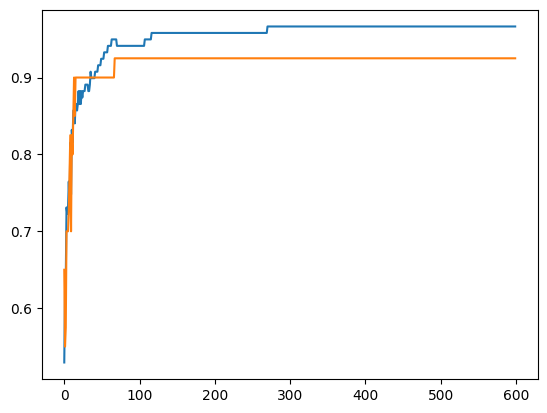

In [228]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()